In [143]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{max-width:80%!important;width:auto!important;}</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%reload_ext autoreload
%autoreload 2
%matplotlib inline

import cv2

import numpy as np

import sys
sys.path.append('../')

from depth_Functions import (
    import_raw_colour_image, 
    import_raw_depth_image,
    show_img, 
    show_array_of_images
)
    
from Feature_Extraction import (
    get_patchsize,
    process_patches, 
    create_local_feature_vector
)

from Equations import (
    symbol,
    equation
)

from Global_Depth import (
    get_absolute_and_relative_depth,
    get_absolute_depth,
    get_relative_histograms,
    subtract_adjacent
)

In [83]:
bgr = import_raw_colour_image('../GTA_images/Simple/Colour/color_1.raw')
ycc = cv2.cvtColor(bgr, cv2.COLOR_BGR2YCrCb)
depth = import_raw_depth_image('../GTA_images/Simple/Depth/depth_1.raw')

In [84]:
image = ycc
patchsize = 6
scales = [(3,3), (9,9)]

# Laplacian

{{equation('P(d|X;\theta,\lambda) = [E_lap]')}}

## Absolute depth accuracy

{{equation('[S_patch]+[E_abs]')}}

Y = the number of vertical patches

X = the number of horizontal

$d_i$ = the depth at patch i

{{symbol('[V_theta]')}} = $\theta$ vector at row y

## Relative depth

We take relative depth into the consideration with the following equation

{{equation('[S_scale][S_patch][S_adj][E_rel]')}}

$d_i(s)$ is the depth of the center patch at of the patch resized to scale s

$d_j(s)$ is the depth at the given adjacent patch at scale s

## Training

Having calculated the features for our training images the goal of training is to calculate $\theta$s and $\sigma$s

## $\theta$

We calculate {{symbol('[V_theta]')}}s minimise the difference between the observed depth and predicted depth

We do this by calculating the least squares of the following equation

{{equation(f'd_i = [E_pred]')}}

In [ ]:
def least_squares_function(features, *𝜃):
    return features @ np.array(𝜃)

In [ ]:
def least_squares(features, depth, 𝜃):
    return optimize.curve_fit(least_squares_function, 
                              xdata=features.reshape(-1, features.shape[-1]), 
                              ydata=depth.flatten(),
                              p0=𝜃)

### Uncertanties

To combine the absolute and relative we must encorporate uncertanties for both

In [212]:
relative_histogram_6x8 = get_relative_histograms(image, 6, scales)

In [214]:
relative_histogram_6x8[0].shape
relative_histogram_6x8[1].shape
relative_histogram_6x8[2].shape

(120, 160, 4, 17, 10)

(120, 160, 4, 17, 10)

(120, 160, 4, 17, 10)

#### Absolute uncertanty

{{equation(f'[V_l1]=[E_l1]')}}

{{symbol('[V_v]')}} = vector of chosen parameters

#### relative uncertainty

{{equation(f'[V_l2]=[E_l2]')}}

{{symbol('[V_u]')}} = vector of chosen parameters

{{symbol('[V_hist]')}} = relative depth histogram

[Asshutosh et al](https://www.cs.cornell.edu/~asaxena/learningdepth/ijcv_monocular3dreconstruction.pdf) observed that the relative depth histogram and the difference in depths relationship to one another can be fairly well represented by a lapacian curve

We can therefore estimate {{symbol('[V_u]')}} fitting a lapacian graph to fit the following equation

{{equation('[V_hist] = \dfrac{1}{[V_u]}e^{[E_rel]}')}}

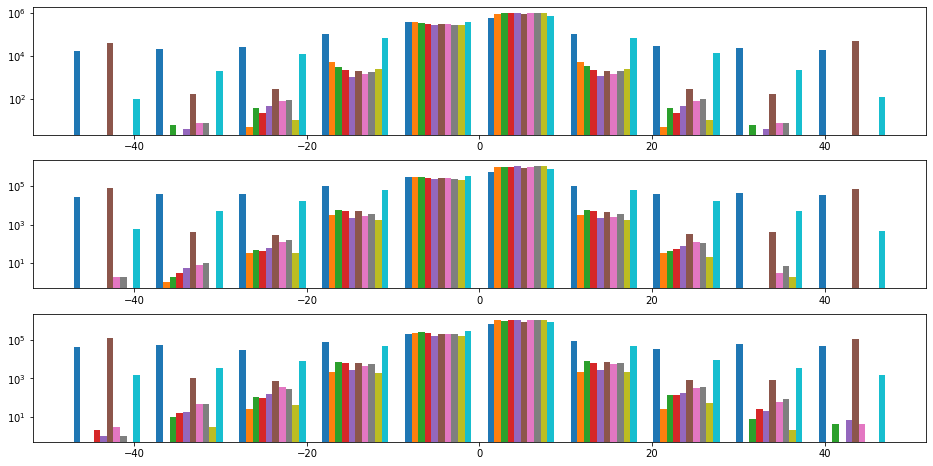

In [244]:
import matplotlib.pyplot as plt

_, axis = plt.subplots(3,1,figsize=(16,8))
for i in range(len(relative_histogram_6x8)):
    axis[i].hist(relative_histogram_6x8[i].reshape(-1,10), 10)
    axis[i].set_yscale('log')
pass;

In [190]:
depth_patches = process_patches(depth, patchsize, function=np.mean)

In [191]:
relative_depths = process_patches(depth, patchsize, function=lambda patch : [np.mean(patch) for i in range(5)])

In [192]:
relative_depths.shape

(120, 160, 5)

In [193]:
relative_depths = subtract_adjacent(relative_depths)

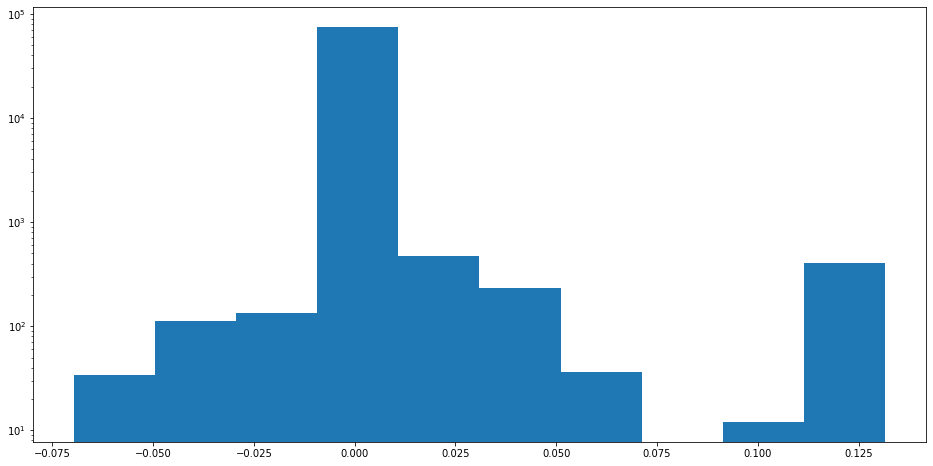

In [240]:
_, axis = plt.subplots(1,1,figsize=(16,8))

axis.hist(relative_depths.flatten(), bins=10)
axis.set_yscale('log')
pass;

ValueError: x and y must be the same size

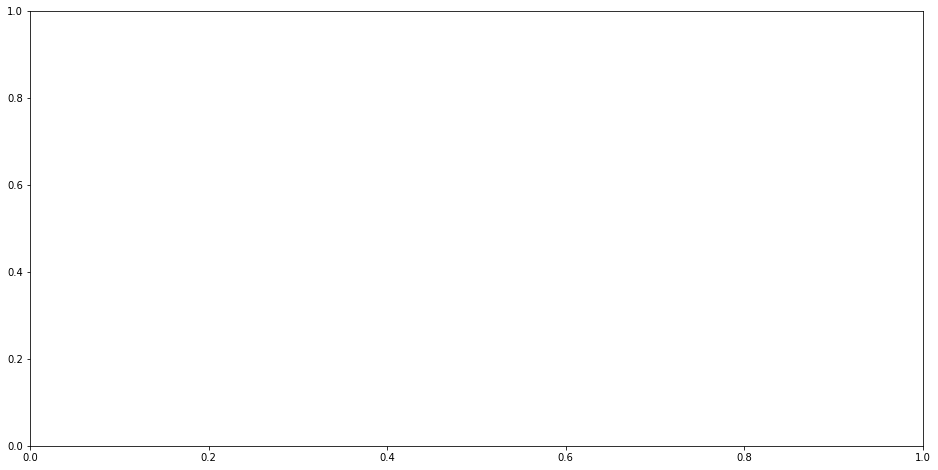

In [221]:
_, axis = plt.subplots(1,1,figsize=(16,8))

axis.scatter(relative_depths.flatten(),relative_histogram_6x8[0].reshape())